In [101]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [42]:
a[2]

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,STARTERS_BENCH,MIN,FGM,FGA,FG_PCT,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
0,0021800002,1610612760,Thunder,OKC,Oklahoma City,Starters,152:29,24,65,0.369,...,0.680,11,19,30,16,10,2,12,13,72
1,0021800002,1610612760,Thunder,OKC,Oklahoma City,Bench,87:31,9,26,0.346,...,0.583,5,10,15,5,2,4,2,8,28
2,0021800002,1610612744,Warriors,GSW,Golden State,Starters,168:37,32,74,0.432,...,0.944,5,31,36,22,5,4,16,18,87
3,0021800002,1610612744,Warriors,GSW,Golden State,Bench,53:19,5,10,0.500,...,0.000,4,8,12,4,1,1,4,7,11


In [5]:
conn = duckdb.connect("../data/processed/nba.duckdb")

In [ ]:
def get_player_games(player_name, season = "2022-23"):
    sql = f"""
    
    """

In [92]:
a = "33:22"

b, c = a.split(":")

In [158]:
def min_to_seconds(_min):
    if not pd.isnull(_min):
        minutes, seconds = _min.split(":")
        minutes = float(minutes) * 60
        return int(minutes + int(seconds))

min_to_seconds(a)
    

180000202

In [163]:
sql = """
SELECT 
    b.GAME_DATE, 
    b.HOME_AWAY,
    a.TEAM_ABBREVIATION, 
    a.PLAYER_NAME,
    CASE
        WHEN a.START_POSITION <> '' THEN 'Yes'
        ELSE 'No'
    END AS STARTER,
    CASE
        WHEN a.MIN IS NULL THEN 'No'
        ELSE 'Yes'
    END AS PLAYED,
    a.MIN, 
    a.REB, 
    a.AST, 
    a.STL, 
    a.BLK, 
    a.PTS,
    e.DEF_RATING AS PLAYER_DEF_RATING,
    a.PLUS_MINUS,
    b.OPPONENT, 
    c.OFF_RATING AS TEAM_OFF_RATING,
    d.OFF_RATING AS OPP_OFF_RATING
FROM players.tb_boxscore AS a
INNER JOIN teams.tb_game_logs AS b ON a.TEAM_ID = b.TEAM_ID AND a.GAME_ID = b.GAME_ID
INNER JOIN teams.tb_boxscore_advanced AS c ON a.TEAM_ID = c.TEAM_ID AND a.GAME_ID = c.GAME_ID
INNER JOIN teams.tb_boxscore_advanced AS d ON a.TEAM_ID <> d.TEAM_ID AND a.GAME_ID = d.GAME_ID
INNER JOIN players.tb_boxscore_advanced AS e ON a.PLAYER_ID = e.PLAYER_ID AND a.GAME_ID = e.GAME_ID
WHERE b.SEASON_YEAR = '2022-23'
ORDER BY b.GAME_DATE;
"""

games = conn.execute(sql).fetch_df()
games["MIN"] = games["MIN"].fillna("00:00")
games["MIN"] = games["MIN"].apply(min_to_seconds)
cols = ["REB", "AST", "STL", "BLK", "PTS", "PLUS_MINUS"]
for col in cols:
    games[col] = games[col].fillna(0)
games

,GAME_DATE,HOME_AWAY,TEAM_ABBREVIATION,PLAYER_NAME,STARTER,PLAYED,MIN,REB,AST,STL,BLK,PTS,PLAYER_DEF_RATING,PLUS_MINUS,OPPONENT,TEAM_OFF_RATING,OPP_OFF_RATING
0,2022-10-18,Away,PHI,P.J. Tucker,Yes,Yes,1981,4.0,0.0,0.0,1.0,6.0,130.800003,-6.0,BOS,119.400002,129.899994
1,2022-10-18,Away,PHI,Joel Embiid,Yes,Yes,2236,15.0,5.0,0.0,1.0,26.0,139.199997,-13.0,BOS,119.400002,129.899994
2,2022-10-18,Away,PHI,James Harden,Yes,Yes,2236,8.0,7.0,0.0,0.0,35.0,118.699997,1.0,BOS,119.400002,129.899994
3,2022-10-18,Away,PHI,Montrezl Harrell,No,Yes,644,0.0,0.0,0.0,1.0,2.0,100.000000,4.0,BOS,119.400002,129.899994
4,2022-10-18,Away,PHI,Danuel House Jr.,No,Yes,972,1.0,1.0,2.0,0.0,1.0,126.500000,-5.0,BOS,119.400002,129.899994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11364,2022-12-17,Away,UTA,Malik Beasley,No,Yes,1680,3.0,0.0,0.0,0.0,18.0,139.300003,-16.0,MIL,102.099998,128.100006
11365,2022-12-17,Away,UTA,Leandro Bolmaro,No,Yes,238,1.0,0.0,0.0,0.0,0.0,137.500000,-3.0,MIL,102.099998,128.100006
11366,2022-12-17,Home,SAS,Malaki Branham,No,Yes,1199,0.0,0.0,2.0,0.0,12.0,92.699997,13.0,MIA,103.099998,114.400002
11367,2022-12-17,Home,LAC,Kawhi Leonard,Yes,Yes,1912,9.0,1.0,3.0,1.0,31.0,89.199997,9.0,WAS,104.099998,95.900002


In [46]:
class PlayersPrediction:
    def __init__(self, player_name, team_opponent="all"):
        

,TEAM_ABBREVIATION,PLAYER_NAME,START_POSITION,MIN,REB,AST,STL,BLK,PTS,OPPONENT,OPP_OFF_RATING,OPP_DEF_RATING
GAME_DATE,,,,,,,,,,,,
2022-10-19,CLE,Donovan Mitchell,F,34:31,2.0,9.0,2.0,0.0,31.0,TOR,97.099998,104.900002
2022-10-19,CLE,Donovan Mitchell,F,34:31,2.0,9.0,2.0,0.0,31.0,TOR,104.900002,97.099998
2022-10-19,CLE,Donovan Mitchell,F,34:31,2.0,9.0,2.0,0.0,31.0,TOR,82.099998,100.000000
2022-10-19,CLE,Donovan Mitchell,F,34:31,2.0,9.0,2.0,0.0,31.0,TOR,100.000000,82.099998
2022-10-19,CLE,Donovan Mitchell,F,34:31,2.0,9.0,2.0,0.0,31.0,TOR,93.300003,102.900002
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-17,CLE,Donovan Mitchell,G,42:14,4.0,3.0,1.0,0.0,25.0,DAL,121.900002,105.300003
2022-12-17,CLE,Donovan Mitchell,G,42:14,4.0,3.0,1.0,0.0,25.0,DAL,113.699997,98.000000
2022-12-17,CLE,Donovan Mitchell,G,42:14,4.0,3.0,1.0,0.0,25.0,DAL,98.000000,113.699997


<AxesSubplot: xlabel='GAME_DATE', ylabel='PTS'>

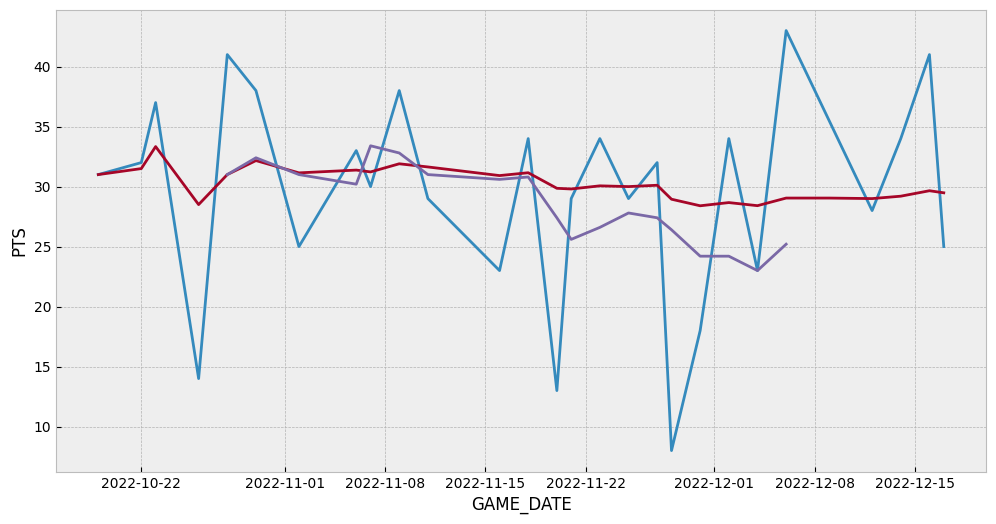

In [33]:
sns.lineplot(x="GAME_DATE", y="PTS", data=games.reset_index())
sns.lineplot(x="GAME_DATE", y="PTS", data=teste)
sns.lineplot(x="GAME_DATE", y="PTS", data=teste2)